# Imports

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd
import datatable as dt

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

# Load dataset

In [2]:
%%time
train = dt.fread('../input/tabular-playground-series-oct-2021/train.csv').to_pandas()
test  = dt.fread('../input/tabular-playground-series-oct-2021/test.csv').to_pandas()
sub   = dt.fread('../input/tabular-playground-series-oct-2021/sample_submission.csv').to_pandas()

CPU times: user 22.5 s, sys: 8.01 s, total: 30.5 s
Wall time: 23.9 s


# General overview

In [3]:
train.head(5)

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,0.147295,0.026177,0.106613,0.200924,0.713191,0.155750,0.557335,0.341702,0.285720,0.230396,0.203957,0.509588,0.706972,True,0.007793,0.247765,0.263750,0.259555,0.231730,0.138379,0.197824,0.054392,0.194153,0.281500,0.034818,0.025334,0.114432,0.139203,0.246157,0.251371,0.701423,0.301182,0.193924,0.267497,False,0.193430,0.238630,0.154770,0.249857,0.210685,0.406662,0.214810,0.258668,0.377518,0.192042,0.340855,0.199660,0.264074,0.205550,0.075109,0.205688,0.178962,0.245008,0.519336,0.306419,0.127139,0.367479,0.236380,0.195694,0.013195,0.199588,0.283367,0.168824,0.004855,0.117723,0.257688,0.197262,0.211452,0.372637,0.198157,0.689970,0.449955,0.713110,0.212041,0.183619,0.288667,0.648678,0.600398,0.223267,0.590163,0.248847,0.795641,0.139932,0.618696,0.639142,0.008549,0.559151,0.573640,0.138808,0.499156,0.112203,0.181498,0.165887,0.093171,0.106952,0.127861,0.250924,0.501673,0.036740,0.111361,0.075918,0.019444,0.250760,0.465093,0.087502,0.004185,0.195936,0.166389,0.171328,0.146014,0.199232,0.133999,0.168191,0.010242,0.294490,0.012977,0.003969,0.013739,0.040076,0.170711,0.250246,0.195538,0.708556,0.448925,0.550352,0.217984,0.751629,0.822459,0.186298,0.024197,0.044097,0.078943,0.181147,0.022591,0.576712,0.406843,0.510578,0.799434,0.651125,0.460708,0.636714,0.350704,0.872989,0.007751,0.017103,0.019875,0.203042,0.864594,0.595877,0.542969,0.990250,0.020373,0.006238,0.011040,0.006019,0.407014,0.080140,0.013502,0.144265,0.007229,0.003256,0.014556,0.123806,0.133871,0.011531,0.010250,0.253750,0.090162,0.147857,0.303087,0.112764,0.104344,0.168583,0.011342,0.239028,0.008018,0.167653,0.217342,0.184178,0.179060,0.078009,0.135768,0.006534,0.009832,0.013317,0.390079,0.004801,0.056600,0.114139,0.012599,0.014818,0.446073,0.216079,0.152113,0.111237,0.170896,0.190477,0.011936,0.005227,0.429740,0.013060,0.199369,0.258410,0.208863,0.129545,0.006978,0.012948,0.049466,0.008804,0.114205,0.119683,0.191210,0.169976,0.188199,0.355674,0.013164,0.304878,0.007213,0.011277,0.083186,0.010624,0.031199,0.200306,0.195791,0.203470,0.036314,0.157711,0.199117,0.007444,0.189048,0.202540,0.273267,0.167211,True,False,True,True,True,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,True,True,False,False,False,True,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,0.238509,0.493411,0.107277,0.231828,0.457150,0.395200,0.617088,0.459358,0.209225,0.201098,0.199383,0.366578,0.585788,True,0.285311,0.400367,0.162493,0.249365,0.141160,

In [4]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 287 columns):
 #    Column  Dtype  
---   ------  -----  
 0    id      int32  
 1    f0      float64
 2    f1      float64
 3    f2      float64
 4    f3      float64
 5    f4      float64
 6    f5      float64
 7    f6      float64
 8    f7      float64
 9    f8      float64
 10   f9      float64
 11   f10     float64
 12   f11     float64
 13   f12     float64
 14   f13     float64
 15   f14     float64
 16   f15     float64
 17   f16     float64
 18   f17     float64
 19   f18     float64
 20   f19     float64
 21   f20     float64
 22   f21     float64
 23   f22     bool   
 24   f23     float64
 25   f24     float64
 26   f25     float64
 27   f26     float64
 28   f27     float64
 29   f28     float64
 30   f29     float64
 31   f30     float64
 32   f31     float64
 33   f32     float64
 34   f33     float64
 35   f34     float64
 36   f35     float64
 37   f36     float64
 38   f

In [5]:
train.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,100

In [6]:
def nan_counts(df):
    null_counts = df.isna().sum()
    info_df = pd.DataFrame(list(zip(null_counts.index,null_counts.values))\
                                         , columns = ['Column', 'nan_counts'])
    data_types = df.dtypes
    info_df['Dtype'] = data_types.values
    return info_df.T

In [7]:
nan_counts(train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286
Column,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
nan_counts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dtype,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float6

# Feature distribution

In [8]:
def plot_feature_distribution(train, test):
    fig = plt.figure(figsize = (15, 71))
    cols = train.columns.tolist()[1:119]
    for i in cols:
        plt.subplot(24,5,cols.index(i)+1)
        sns.set_style("white")
        plt.title(i, size = 12, fontname = 'monospace')
        a = sns.kdeplot(train[i], color = '#f9ba32', linewidth = 1.3)
        sns.kdeplot(test[i], color = '#426e86', linewidth = 1.3)
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(fontname = 'monospace')
        plt.yticks([])
        for j in ['right', 'left', 'top']:
            a.spines[j].set_visible(False)
            a.spines['bottom'].set_linewidth(1.2)

    fig.tight_layout(h_pad = 3)

    plt.figtext(0.335, 1.02, 'Distribution of features', color = '#2f3131', fontname = 'monospace', size = 25)
    plt.figtext(0.3, 1.01, 'train', color = '#f9ba32', fontname = 'monospace', size = 18)
    plt.figtext(0.66, 1.01, 'test', color = '#426e86', fontname = 'monospace', size = 18)

    plt.show()

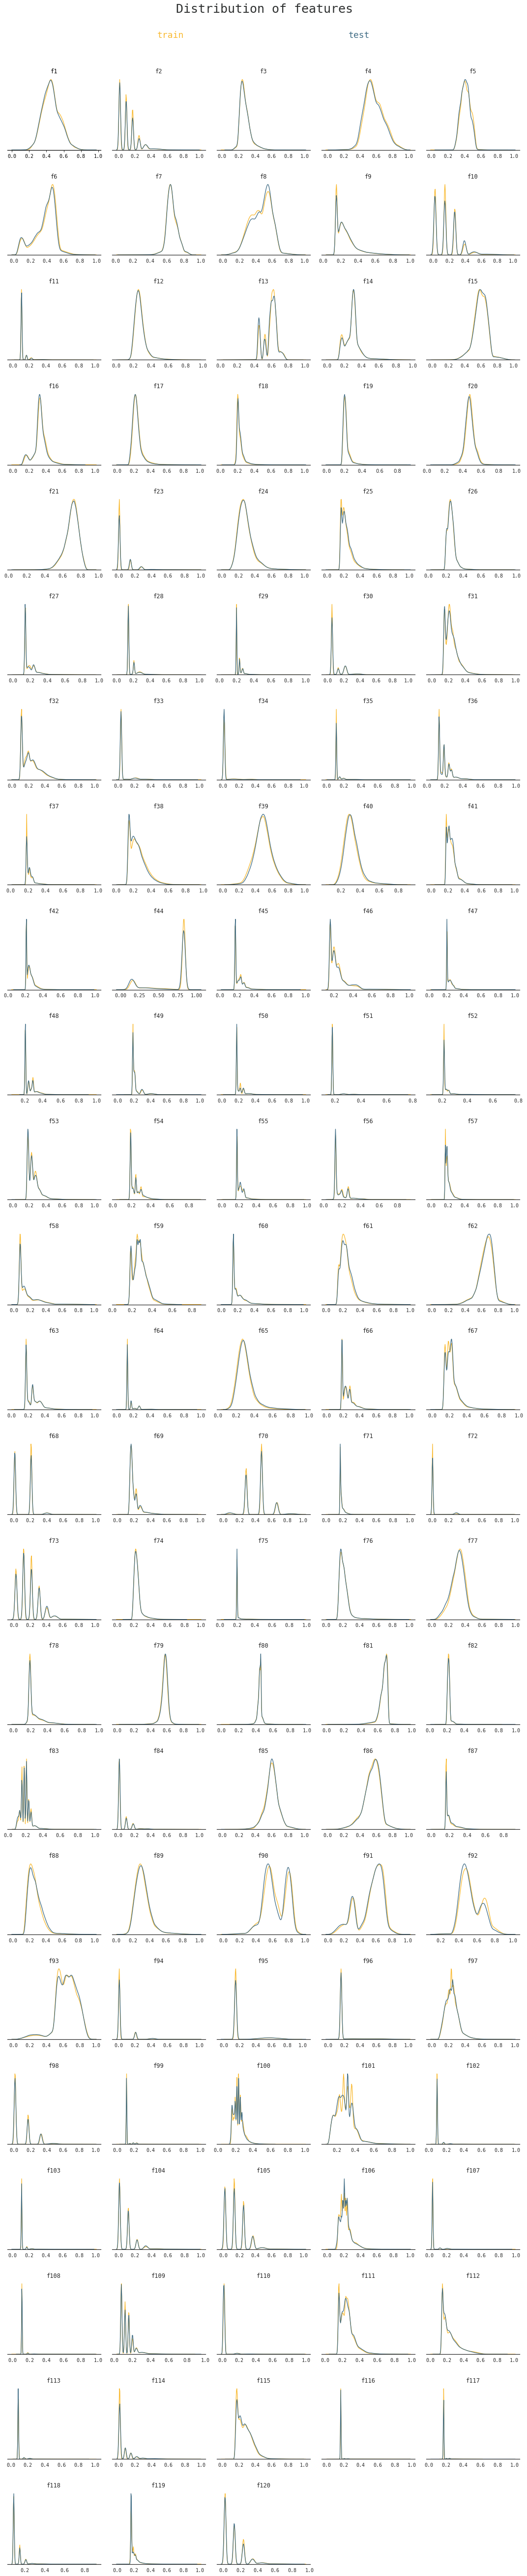

In [9]:
plot_feature_distribution(train.select_dtypes(include='float64') , test.select_dtypes(include='float64') )

# Target distribution

<AxesSubplot:ylabel='target'>

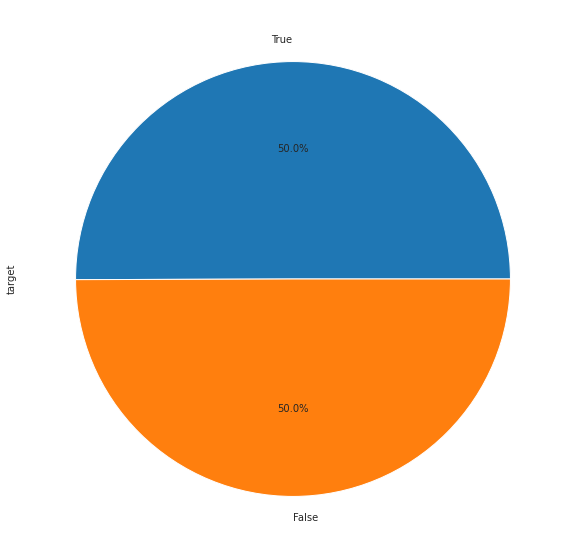

In [10]:
train.target.value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')